In [ ]:
import os
import time
import torch
import numpy as np
from torch.utils import data
from loader.real_data_loader import real_data_loader
from utils.data import *
from models.unet import Unet
from models.utils import *
from models.discriminator import Basic_D
from utils.train import *
from IPython.display import clear_output

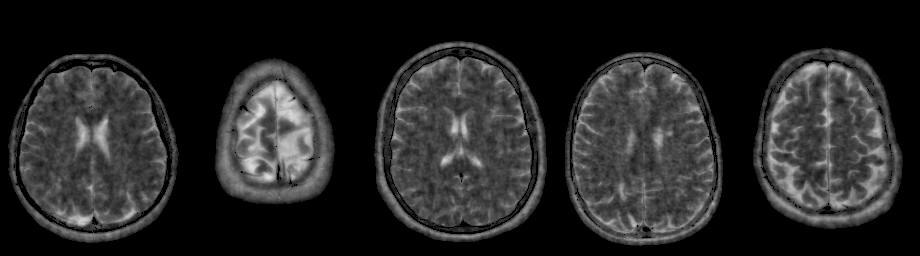

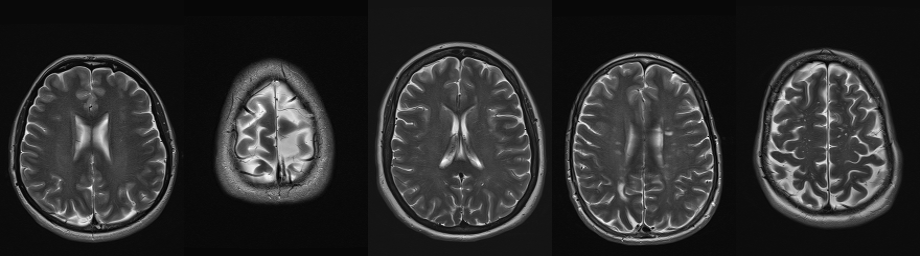

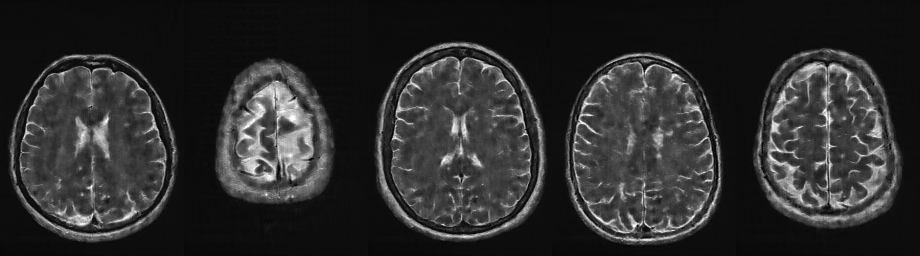

epochs: [25/150], batchs: [1000], Loss_D: 0.012144, Loss_G: 6.360922, loss_L1: 0.029481, time: 36440s


In [ ]:
if __name__ == '__main__':

    os.environ["CUDA_VISIBLE_DEVICES"] = '1'
    t0 = time.time()
    lrG = lrD = 2e-4
    niter = 150
    epoch = 0
    gen_iterations = 0
    errL1_sum = errG_sum = errD_sum = 0
    
    display_iters = 10
    lambda_l1 = 1000

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    dataLoader = real_data_loader(split = 'train')
    trainLoader = data.DataLoader(dataLoader, batch_size = 8, shuffle = True)

    netG = Unet(input_channels=2, output_channels=1, num_filters=[2**i for i in range(4, 9)])
    netD = Basic_D(input_channels=2, output_channels=1, num_filters=[32, 64, 128, 256])
    netG.to(device)
    netD.to(device)

    optimizerD, optimizerG = get_optimizers(netG, netD, lrG, lrD)
    # print(netG)
    
    while epoch < niter: 
        
        epoch += 1
        for idx, (inputs, targets) in enumerate(trainLoader):
            
            if gen_iterations%display_iters == 0:
                if gen_iterations%(5*display_iters)==0:           
                    clear_output()
                
                sampling = True
                inputs_show, idxs = showImage(inputs, sampling=sampling)
                
                sampling = False
                targets_show, idxs = showImage(targets, idxs=idxs, sampling=sampling)

                inputs = inputs.to(device)
                outputs = netG(inputs)
                outputs_np = np.squeeze(np.asarray(outputs.cpu().detach()))
                outputs_show, idxs = showImage(outputs_np, idxs=idxs, sampling=sampling)

                print('epochs: [%d/%d], batchs: [%d], Loss_D: %f, Loss_G: %f, loss_L1: %f, time: %ds'
                % (epoch, niter, idx, errD_sum/display_iters, 
                errG_sum/display_iters, errL1_sum/display_iters, time.time()-t0))
                errL1_sum = errG_sum = errD_sum = 0
                
            inputs = inputs.to(device)
            targets = targets.to(device)
            errD = netD_train(inputs, targets, netD, netG, optimizerD)
            errD_sum += errD

            errG, errL1 = netG_train(inputs, targets, netD, netG, optimizerG, lambda_l1)
            errG_sum += errG
            errL1_sum += errL1

            gen_iterations += 1

In [ ]:
optimizerG.zero_grad()
# netG(inputs)

In [ ]:
np.amin((2,3))

In [ ]:
idx

In [ ]:
inputs.shape

In [ ]:
targets.shape